# <center> Portfolio Optimization </center>
 <center> BIA-650 Group Project </center>
  <center> Liang An, Jhao-Han Chen, Xuanzhu Luo, Jiamei Wang, Ming Wei </center>

In [12]:
# import needed modules
import pandas_datareader.data as wb
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

# Select 15 Stocks From Different Sectors
1. **Technology**: AAPLConsumer 
2. **Technology**: Adobe Inc. (ADBE)
3. **Consumer Cyclical**: Amazon (AMZN)
4. **Financial Services**: American Express Company (AXP) 
5. **Energy**: Bristow Group Inc. (BRS)
6. **Utilities**: FE 
7. **Healthcare**: Edwards Lifesciences Corporation (EW)  
8. **Technology** GOOG
9. **Health Care**: JNJ **Consumer Discretionary**:WMT
10. **Financial Services**:Mastercard Incorporated (MA)
11. **Consumer Cyclical**: Netflix (NFLX)
12. **Technology**: NVIDIA Corporation (NVDA)
13. **Healthcare**: Regeneron Pharmaceuticals, Inc. (REGN)
14. **Basic Materials**: The Sherwin-Williams Company (SHW)
15. **Consumer Defensive**: Walmart Inc. (WMT)

In [13]:
stocks = ['AAPL','ADBE','AMZN','AXP','BRS','FE','EW','GOOG','JNJ','MA','NFLX','NVDA','REGN','SHW','WMT']
start = dt.datetime(2006,12,29)
end = dt.datetime(2018,10,26)
data = wb.DataReader(stocks, 'yahoo', start, end)['Adj Close'] 

# Adjusted Close Price of each Stock (First 5 Rows)

In [14]:
data.head()

Symbols,AAPL,ADBE,AMZN,AXP,BRS,EW,FE,GOOG,JNJ,MA,NFLX,NVDA,REGN,SHW,WMT
Date,,,,,,,,,,,,,,,
2006-12-29,8.116311,41.119999,39.459999,49.860943,31.877892,11.7600,34.580856,228.752182,46.053902,7.543188,3.694286,22.812717,20.070000,52.953304,34.890945
2007-01-03,8.016820,39.919998,38.700001,49.729145,30.711952,11.9850,34.672615,232.284210,46.318977,7.383883,3.801429,22.239473,19.809999,52.778400,35.926044
2007-01-04,8.194759,40.820000,38.900002,49.366627,29.775654,12.0050,34.632469,240.068588,46.897968,7.746151,3.621428,22.134682,20.180000,52.511887,36.099819
2007-01-05,8.136404,40.619999,38.369999,48.715759,29.599001,11.9750,33.898415,242.020889,46.472458,7.740021,3.544286,20.747801,20.799999,51.604073,35.805157
2007-01-08,8.176582,40.450001,37.500000,49.177135,29.837494,11.9025,33.835339,240.227554,46.395737,7.741550,3.404286,20.901896,21.150000,51.387512,35.510490


In [15]:
data.tail()

Symbols,AAPL,ADBE,AMZN,AXP,BRS,EW,FE,GOOG,JNJ,MA,NFLX,NVDA,REGN,SHW,WMT
Date,,,,,,,,,,,,,,,
2018-10-22,219.882782,251.059998,1789.300049,104.510002,11.86,149.309998,38.249050,1101.160034,137.802460,204.500000,329.540009,230.988876,387.799988,402.923096,97.139999
2018-10-23,221.955551,251.759995,1768.699951,104.379997,11.56,148.300003,37.872704,1103.689941,138.050873,202.429993,333.160004,220.839035,380.690002,401.116852,97.800003
2018-10-24,214.342117,238.440002,1664.199951,101.839996,11.26,140.360001,38.338184,1050.709961,136.600113,195.690002,301.829987,199.210678,351.390015,387.095947,97.559998
2018-10-25,219.035751,252.919998,1782.170044,103.599998,11.36,143.350006,37.526062,1095.569946,137.593796,204.199997,312.869995,207.632248,336.940002,367.237213,99.180000
2018-10-26,215.547913,245.800003,1642.810059,101.250000,11.45,140.139999,36.357395,1071.469971,136.103287,197.490005,299.829987,198.091782,335.820007,369.672150,98.940002


# Time-series Plot of the Data


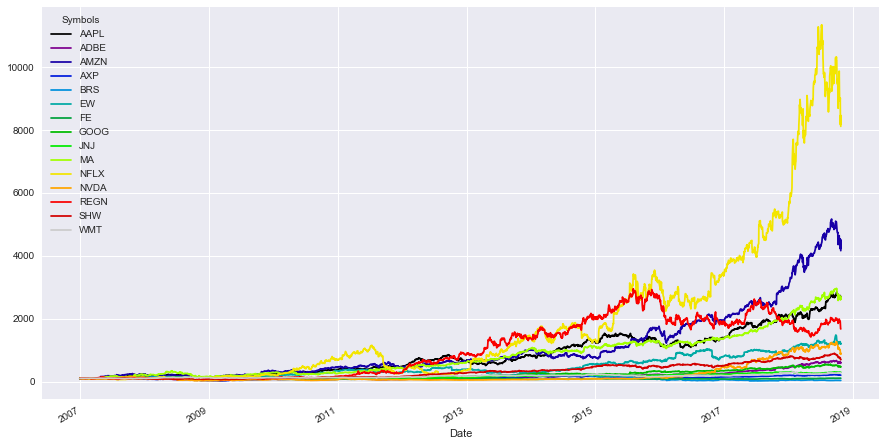

In [46]:
(data/data.iloc[0]*100).plot(figsize=(15,8), colormap='nipy_spectral')


# Daily Log Returns

In [35]:
daily_ret = np.log(data/data.shift(1))
daily_ret.head()

Symbols,AAPL,ADBE,AMZN,AXP,BRS,EW,FE,GOOG,JNJ,MA,NFLX,NVDA,REGN,SHW,WMT
Date,,,,,,,,,,,,,,,
2006-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,-0.012334,-0.029617,-0.019448,-0.002647,-0.037261,0.018952,0.002650,0.015322,0.005739,-0.021345,0.028590,-0.025449,-0.013039,-0.003308,0.029235
2007-01-04,0.021953,0.022295,0.005155,-0.007317,-0.030961,0.001667,-0.001159,0.032963,0.012423,0.047896,-0.048508,-0.004723,0.018505,-0.005062,0.004825
2007-01-05,-0.007147,-0.004912,-0.013718,-0.013272,-0.005950,-0.002502,-0.021423,0.008099,-0.009115,-0.000792,-0.021532,-0.064705,0.030261,-0.017439,-0.008196
2007-01-08,0.004926,-0.004194,-0.022935,0.009426,0.008025,-0.006073,-0.001862,-0.007437,-0.001652,0.000198,-0.040302,0.007400,0.016687,-0.004205,-0.008264


## Look at Stocks' Volatility

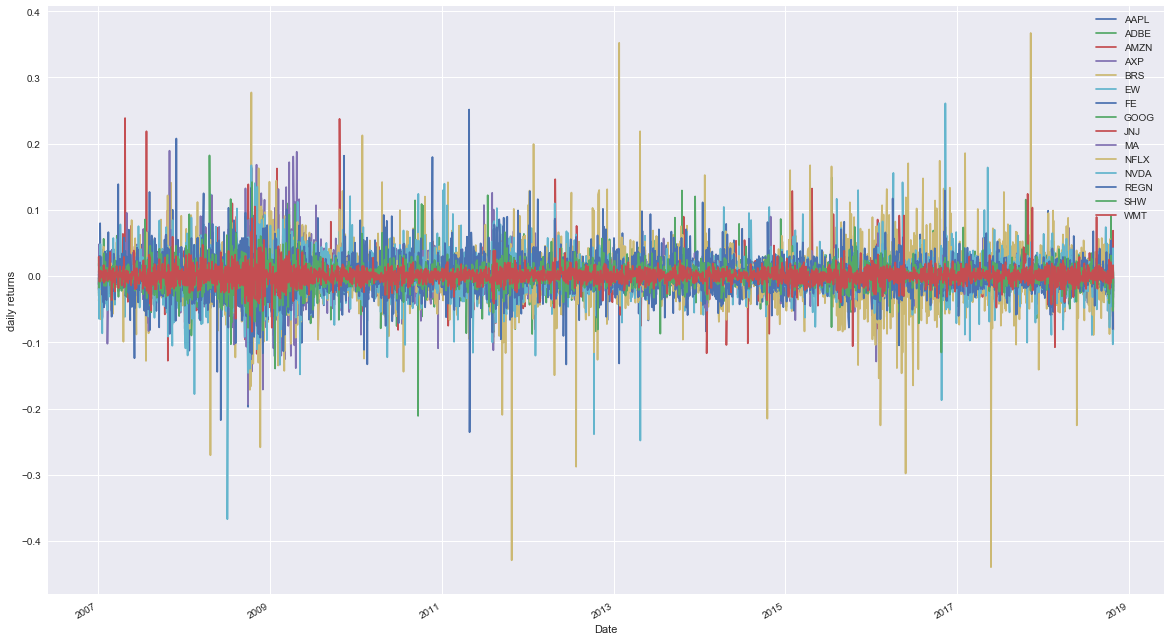

In [79]:
daily_ret.plot(grid = True,figsize=(20, 12))
plt.ylabel('daily returns')
plt.legend(loc='upper right', fontsize=10)

# Annual Returns

In [19]:
annual_ret = daily_ret.mean() * 252

df_annual = pd.DataFrame(annual_ret)
df_annual.columns = ['Annual Return']
df_annual

,Annual Return
Symbols,
AAPL,0.277590
ADBE,0.151354
AMZN,0.315646
AXP,0.059962
BRS,-0.086674
EW,0.209755
FE,0.004241
GOOG,0.130711
JNJ,0.091726


# Covariance of Annualized Returns

In [20]:
cov_annual = daily_ret.cov() * 252
cov_annual

Symbols,AAPL,ADBE,AMZN,AXP,BRS,EW,FE,GOOG,JNJ,MA,NFLX,NVDA,REGN,SHW,WMT
Symbols,,,,,,,,,,,,,,,
AAPL,0.099431,0.045504,0.055081,0.052139,0.043469,0.024189,0.021638,0.048414,0.016935,0.047822,0.046042,0.063725,0.046705,0.028558,0.017713
ADBE,0.045504,0.107702,0.058823,0.063570,0.050128,0.032013,0.029146,0.048719,0.023825,0.053740,0.051037,0.075879,0.055317,0.036132,0.022101
AMZN,0.055081,0.058823,0.150438,0.060302,0.045269,0.028853,0.022697,0.060243,0.022169,0.058337,0.075665,0.069068,0.057385,0.037309,0.020728
AXP,0.052139,0.063570,0.060302,0.139052,0.073097,0.032202,0.035702,0.051736,0.027521,0.071425,0.048724,0.073565,0.062403,0.047752,0.026794
BRS,0.043469,0.050128,0.045269,0.073097,0.285086,0.031012,0.035697,0.041725,0.023977,0.055219,0.041180,0.069185,0.058290,0.035000,0.020824
EW,0.024189,0.032013,0.028853,0.032202,0.031012,0.093152,0.017273,0.024154,0.018277,0.030177,0.031825,0.036335,0.038833,0.022554,0.015794
FE,0.021638,0.029146,0.022697,0.035702,0.035697,0.017273,0.063028,0.021600,0.018206,0.027851,0.019585,0.031537,0.024283,0.018704,0.016767
GOOG,0.048414,0.048719,0.060243,0.051736,0.041725,0.024154,0.021600,0.081444,0.019414,0.048386,0.044372,0.059283,0.047197,0.029273,0.017977
JNJ,0.016935,0.023825,0.022169,0.027521,0.023977,0.018277,0.018206,0.019414,0.026368,0.022851,0.017577,0.024427,0.026191,0.017182,0.014949


# Portfolio Optimization using Efficient Frontier

* Monte Carlo creates hypothetical returns of a real portfolio
* Random portfolios are hypothetical portfolios using real asset returns

We use Monte Carlo Simulation to run 1000,000 different randomly generated weights for the individual stocks and then calculate the expected return, expected volatility and Sharpe Ratio for each of the randomly generated portfolios.

In [80]:
port_ret = []
port_vol = []
sharpe_ratio = []
stock_weights = []

num_assets = len(stocks)

np.random.seed(100) #set random seed 

# Use Monte Carlo Simulation to generate portfolios 
for single_portfolio in range(1000000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, annual_ret)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_ret.append(returns)
    port_vol.append(volatility)
    stock_weights.append(weights)
    
# create a dictionary for r, vol, and sr for each portfolio
portfolio = {'Returns': port_ret,
             'Volatility': port_vol,
             'Sharpe Ratio': sharpe_ratio}

# accomodate each ticker and weight in the portfolio above
for counter,symbol in enumerate(stocks):
    portfolio[symbol +' Weight'] = [Weight[counter] for Weight in stock_weights]

df = pd.DataFrame(portfolio)
column = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in stocks]
df = df[column]

# locate and create min variance portfolio
min_vol = df['Volatility'].min()
min_variance_port = df.loc[df['Volatility'] == min_vol]

# locate and create tangency portfolio
max_sharpe = df['Sharpe Ratio'].max()
tangency_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]

## Plot Mean-Variance Efficient Frontier and Random Portfolios

Text(0,0.5,'Expected Returns')

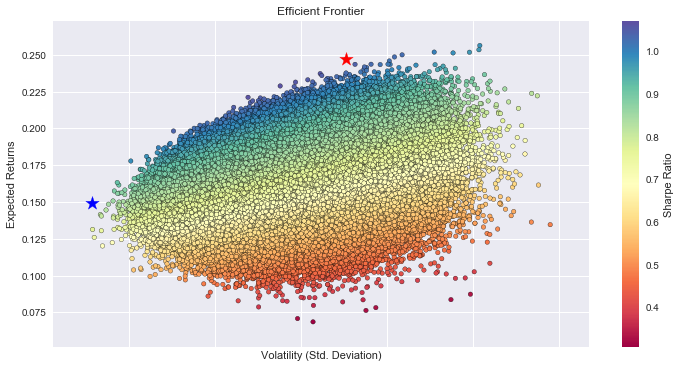

In [81]:
#plot random portfolios generated from Monte Carlo Simulation
df.plot.scatter(x='Volatility', 
                y='Returns', 
                c='Sharpe Ratio',
                cmap='Spectral', 
                edgecolors='black', 
                figsize=(12, 6), 
                grid=True)

# Plot Tangency Portfolio
plt.scatter(x=tangency_portfolio['Volatility'], 
            y=tangency_portfolio['Returns'], 
            c='red', marker='*', s=200, label ="Tangency Portfolio")
# Min Variance Portfolio
plt.scatter(x=min_variance_port['Volatility'], 
            y=min_variance_port['Returns'], 
            c='blue', marker='*', s=200,label ="Min Variance Portfolio" )
plt.title('Efficient Frontier',visible=True)
plt.xlabel('Volatility (Std. Deviation)',visible=True)
plt.ylabel('Expected Returns',visible=True)


## Optimization Results

In [82]:
mvp = pd.DataFrame(min_variance_port.T)
mvp.columns = ['Min Variance Portfolio']
mvp

,Min Variance Portfolio
Returns,0.149296
Volatility,0.171509
Sharpe Ratio,0.870482
AAPL Weight,0.045764
ADBE Weight,0.009262
AMZN Weight,0.028537
AXP Weight,0.019046
BRS Weight,0.007946
FE Weight,0.126457
EW Weight,0.120894


In [83]:
tp = pd.DataFrame(tangency_portfolio.T)
tp.columns = ['Tangency Portfolio']
tp

,Tangency Portfolio
Returns,0.246810
Volatility,0.230457
Sharpe Ratio,1.070959
AAPL Weight,0.169399
ADBE Weight,0.051639
AMZN Weight,0.100744
AXP Weight,0.026263
BRS Weight,0.005847
FE Weight,0.147941
EW Weight,0.005510


### Weights Comparison

<img style="float: left;" src='Picture1.png'  width='35%'/><img src='Picture2.png' width='35%'/>

### Returns, Sharpe Ratio, Volatility Comparison

<img  src='Picture3.png' width='60%'/>